https://www.kaggle.com/c/house-prices-advanced-regression-techniques

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv("train.csv", index_col="Id")

In [3]:
sns.set_style("darkgrid")
pd.options.display.max_columns = df.shape[1]

In [4]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

In [6]:
df.describe(include=[np.number])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
df.describe(include=["O"])

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1452,1460,1460,1460,1423,1423,1422,1423,1422,1460,1460,1460,1459,1460,1460,770,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,864,906,1282,647,649,1311,953,430,1256,1428,741,1365,1334,735,1360,380,870,605,1311,1326,1340,3,157,49,1267,1198


OverallQual, OverallCond, YearBuilt, BedroomAbvGr, KitchenAbvGr,KitchenQual first i will check how this labels related to saleprice
- i might create a new label TotalSF

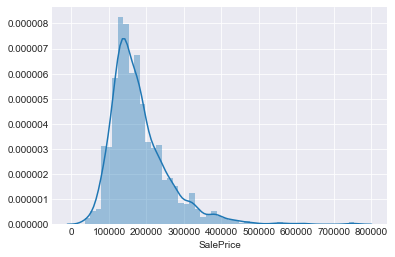

In [8]:
sns.distplot(df["SalePrice"])

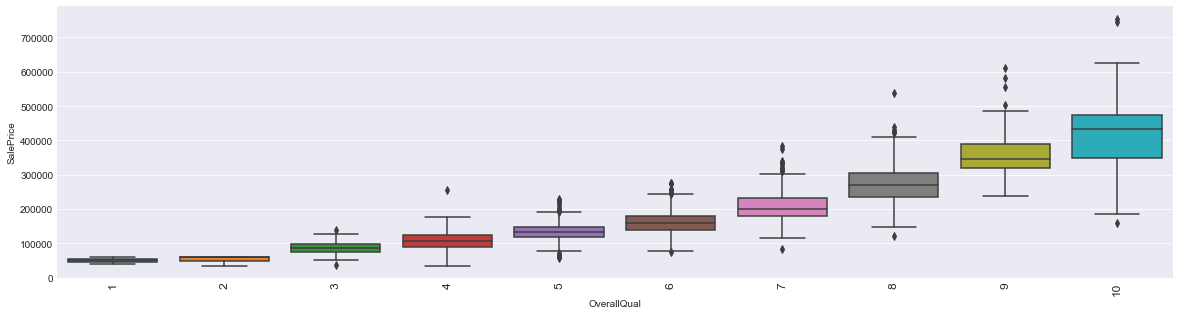

In [9]:
plt.figure(figsize=(20,5))
plt.xticks(rotation="vertical",fontsize=12)
sns.boxplot("OverallQual", "SalePrice", data=df)

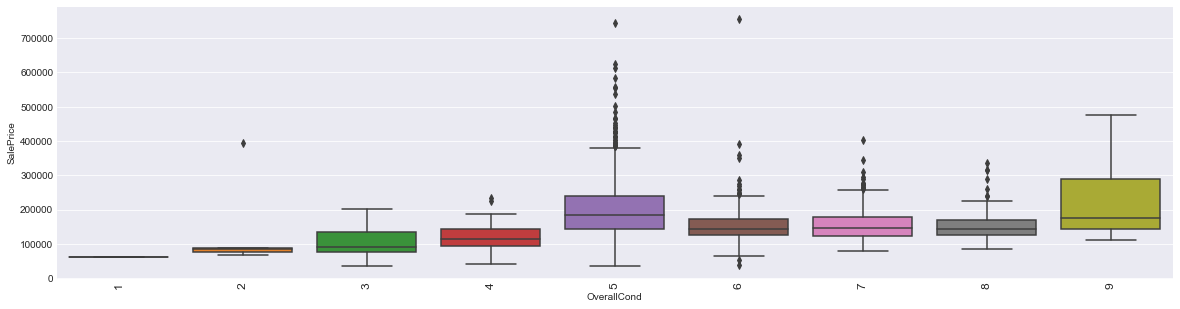

In [10]:
plt.figure(figsize=(20,5))
plt.xticks(rotation="vertical",fontsize=12)
sns.boxplot("OverallCond", "SalePrice", data=df)

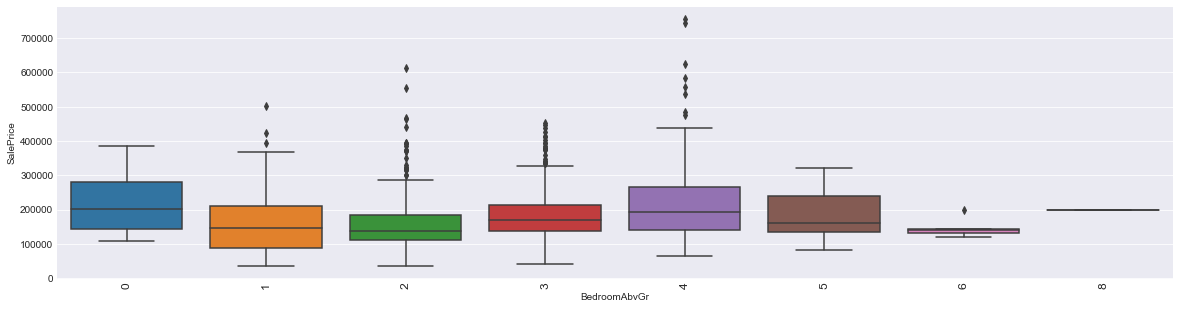

In [11]:
plt.figure(figsize=(20,5))
plt.xticks(rotation="vertical",fontsize=12)
sns.boxplot("BedroomAbvGr", "SalePrice", data=df)

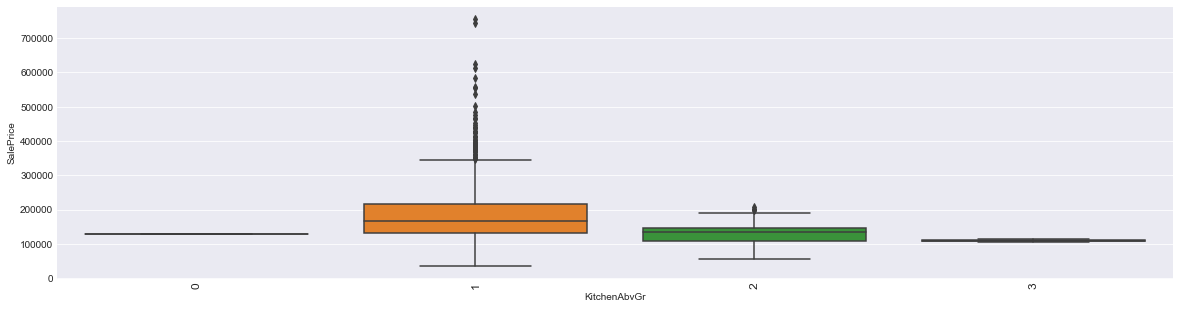

In [12]:
plt.figure(figsize=(20,5))
plt.xticks(rotation="vertical",fontsize=12)
sns.boxplot("KitchenAbvGr", "SalePrice", data=df)

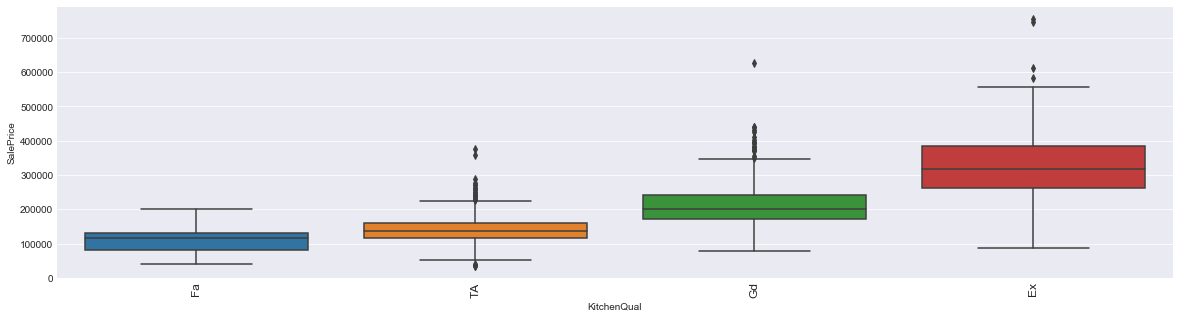

In [13]:
plt.figure(figsize=(20,5))
plt.xticks(rotation="vertical",fontsize=12)
sns.boxplot("KitchenQual", "SalePrice", data=df,order=["Fa","TA","Gd","Ex"])

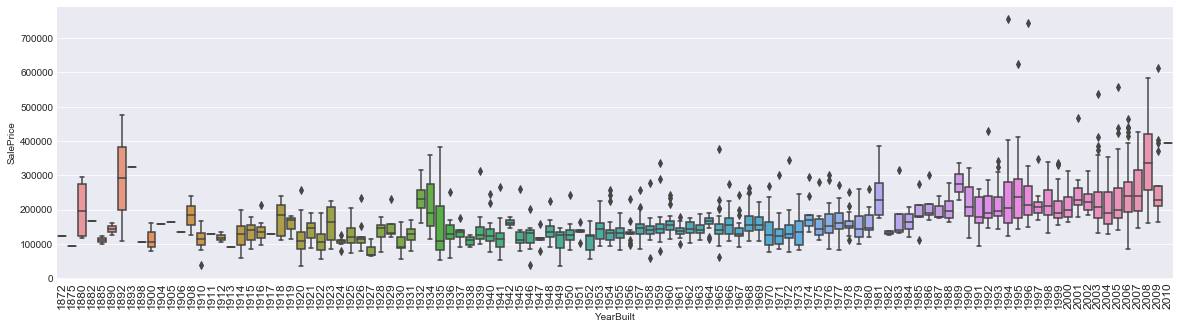

In [14]:
plt.figure(figsize=(20,5))
plt.xticks(rotation="vertical",fontsize=12)
sns.boxplot("YearBuilt", "SalePrice", data=df)

In [15]:
categorical = "SaleCondition SaleType Fence PoolQC PavedDrive GarageCond GarageQual GarageFinish GarageType FireplaceQu Functional KitchenQual Electrical CentralAir HeatingQC Heating BsmtFinType2 BsmtFinType1 BsmtExposure BsmtCond BsmtQual Foundation ExterCond ExterQual MasVnrType Exterior2nd Exterior1st RoofMatl RoofStyle OverallCond OverallQual HouseStyle BldgType Condition2 Condition1 Neighborhood LandSlope LotConfig Utilities LandContour LotShape Alley Street MSZoning MSSubClass".split()
numerical = [col for col in df.columns if col not in categorical]

In [16]:
print("categorical: ", len(categorical))
print("numerical: ", len(numerical))

categorical:  45
numerical:  35


In [17]:
year_dist = df.groupby(["YrSold","MoSold"]).mean()["SalePrice"].reset_index()

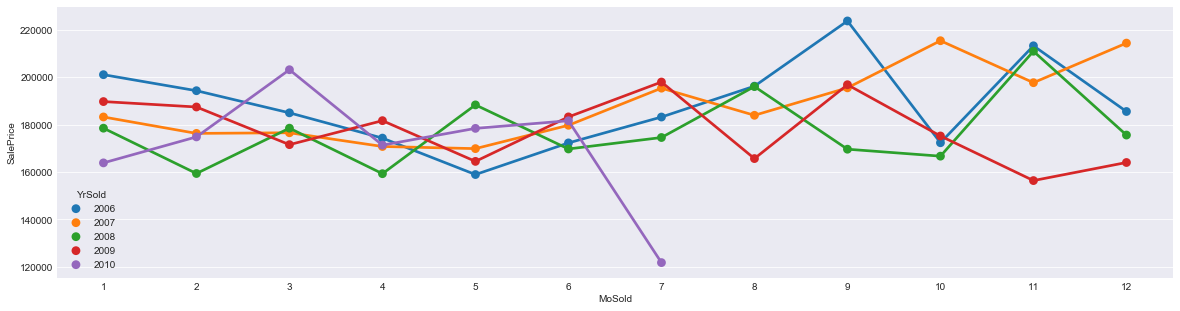

In [18]:
plt.figure(figsize=(20,5))
sns.pointplot("MoSold","SalePrice","YrSold",data=year_dist)

- Seems like house prices decreased each year

In [19]:
df[numerical].describe()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1201.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,70.049958,10516.828082,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,24.284752,9981.264932,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,21.000000,1300.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,59.000000,7553.500000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,69.000000,9478.500000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,80.000000,11601.500000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,313.000000,215245.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [20]:
#lets add test data too
df = pd.concat([df, pd.read_csv("test.csv", index_col="Id")])
test_begin = pd.read_csv("test.csv",index_col="Id").index

In [21]:
df["TotalArea"] = df[["TotalBsmtSF","1stFlrSF","2ndFlrSF"]].sum(axis=1)
numerical.append("TotalArea")

In [22]:
df["GrLivArea/TotalArea"] = df["GrLivArea"] / df["TotalArea"]
numerical.append("GrLivArea/TotalArea")

In [23]:
df["TotalBath"] = df[["BsmtFullBath","BsmtHalfBath","FullBath","HalfBath"]].sum(axis=1)

In [24]:
df["Year_Built_Sold"] = df["YrSold"] - df["YearBuilt"]

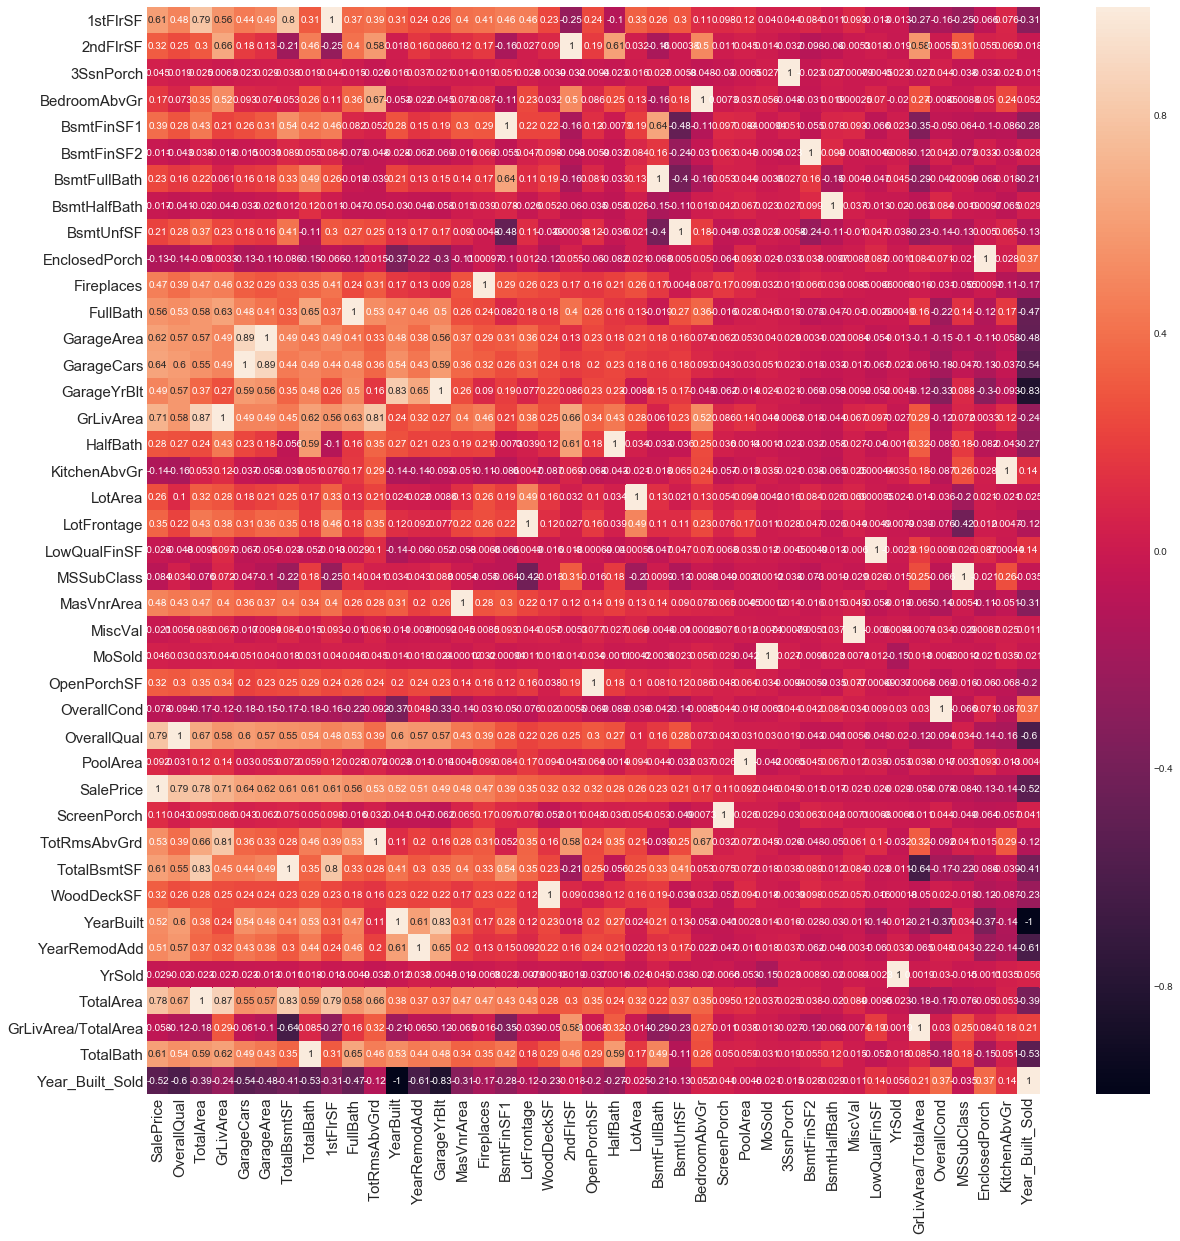

In [25]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr().sort_values("SalePrice",ascending=False, axis=1),annot=True)
plt.xticks(fontsize=15);
plt.yticks(fontsize=15);

In [26]:
df_corr = df.corr()["SalePrice"]
abs(df_corr).sort_values(ascending=False)[:15]

SalePrice          1.000000
OverallQual        0.790982
TotalArea          0.782260
GrLivArea          0.708624
GarageCars         0.640409
GarageArea         0.623431
TotalBsmtSF        0.613581
TotalBath          0.613005
1stFlrSF           0.605852
FullBath           0.560664
TotRmsAbvGrd       0.533723
Year_Built_Sold    0.523350
YearBuilt          0.522897
YearRemodAdd       0.507101
GarageYrBlt        0.486362
Name: SalePrice, dtype: float64

In [27]:
df.drop(df_corr[abs(df_corr) < 0.15].index, axis=1,inplace=True)

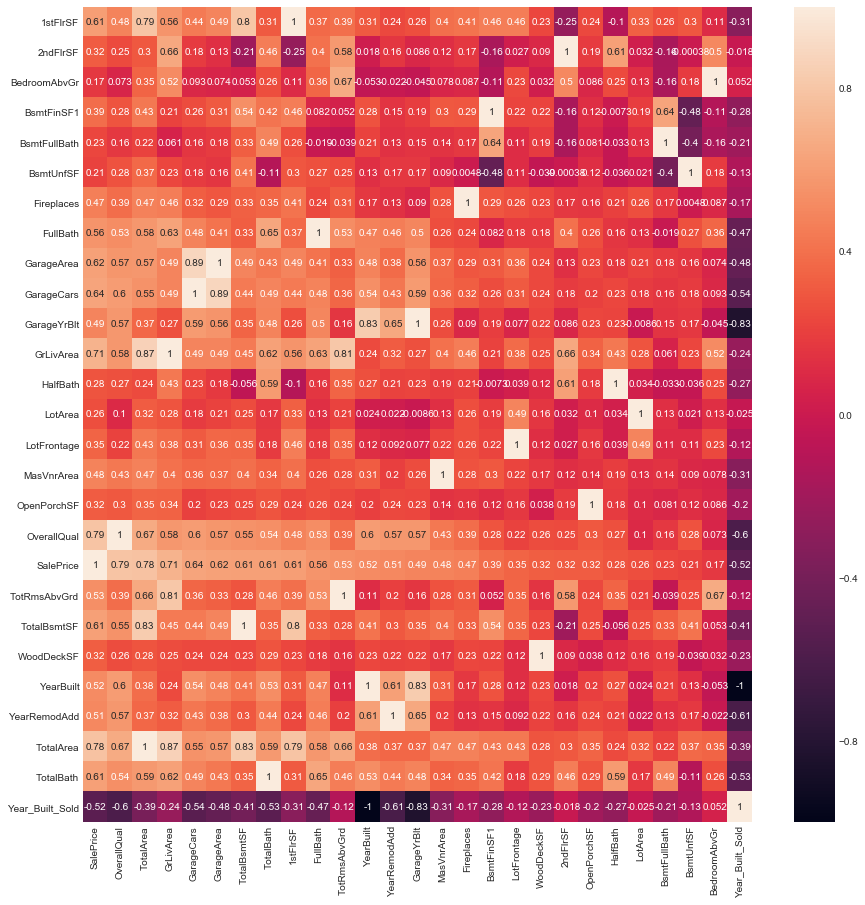

In [28]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr().sort_values(by="SalePrice",ascending=False,axis=1),annot=True)

Text(0,0.5,'SalePrice')

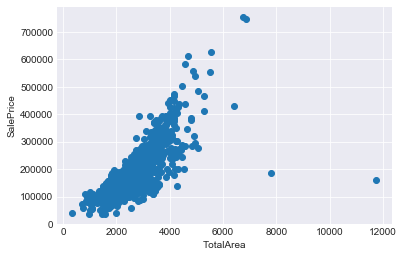

In [29]:
plt.scatter("TotalArea", "SalePrice", data=df)
plt.xlabel("TotalArea")
plt.ylabel("SalePrice")

There are 2 points TotalArea higher than ~7600.These are outliers.Also its seems there is parabolic relation between saleprice and total area

In [30]:
df.drop(df.loc[:test_begin[0]-1][df["TotalArea"] > 7600].index, inplace=True)

C:\Programming\Anaconda\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


Text(0,0.5,'SalePrice')

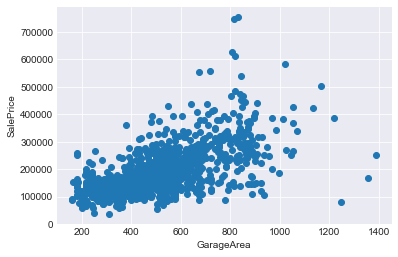

In [31]:
plt.scatter("GarageArea", "SalePrice", data=df[df["GarageArea"]>0])
plt.xlabel("GarageArea")
plt.ylabel("SalePrice")

- This one also looks like parabolic but a weird one i will remove GarageArea higher than 1300

In [32]:
df.drop(df.loc[:test_begin[0]-1][df["GarageArea"] > 1300].index, inplace=True)

C:\Programming\Anaconda\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


Text(0,0.5,'SalePrice')

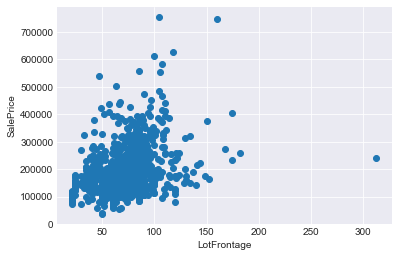

In [33]:
plt.scatter("LotFrontage", "SalePrice", data=df[df["GarageArea"]>0])
plt.xlabel("LotFrontage")
plt.ylabel("SalePrice")

it looks like a weird triangle.i will remove LotFrontage higher than 300

In [34]:
df.drop(df.loc[:test_begin[0]-1][df["LotFrontage"] > 300].index, inplace=True)

C:\Programming\Anaconda\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [35]:
missing_rate = df.isnull().sum()/df.isnull().count()
df_miss = pd.DataFrame(data=missing_rate)
df_miss.columns = ["MissingPercentage"]

In [36]:
df_miss.sort_values("MissingPercentage", ascending=False)[:34]

,MissingPercentage
PoolQC,0.996911
MiscFeature,0.963967
Alley,0.932052
Fence,0.804049
SalePrice,0.500686
FireplaceQu,0.487303
LotFrontage,0.166438
GarageYrBlt,0.054564
GarageQual,0.054564
GarageCond,0.054564


# Handling missing data

I will fill missing pool data with binary.It is normal most of the data NA because most of the houses dont have pool

In [37]:
df["PoolQC"] = df["PoolQC"].map({np.NAN:"0","Fa":2,"Gd":3,"Ex":4})

In [38]:
df["PoolQC"].value_counts()

0    2905
4       4
3       3
2       2
Name: PoolQC, dtype: int64

I will drop MiscFeature because i dont think i will give much info since most of the data is missing.
I will also drop Alley because of the same reason.

In [39]:
df.drop("MiscFeature", axis=1, inplace=True)

In [40]:
df.drop("Alley", axis=1, inplace=True)

In [41]:
df["LotFrontage"].fillna(np.mean(df["LotFrontage"]), inplace=True)

I will replace NA with zeros for garage related labels because NA means there is no garage

In [42]:
df["GarageCond"].fillna(0, inplace=True)
df["GarageFinish"].fillna("NoGarage", inplace=True)
df["GarageQual"].fillna(0, inplace=True)
df["GarageYrBlt"].fillna(0, inplace=True)
df["GarageArea"].fillna(0, inplace=True)
df["GarageCars"].fillna(0, inplace=True)
df["GarageType"].fillna("NoGarage", inplace=True)

I will replace NA with zeros for basement related labels because NA means there is no basement

In [43]:
df["BsmtExposure"].fillna("NoBsmt", inplace=True)
df["BsmtFinType2"].fillna("NoBsmt", inplace=True)
df["BsmtFinType1"].fillna("NoBsmt", inplace=True)
df["BsmtCond"].fillna("NoBsmt", inplace=True)
df["BsmtQual"].fillna(0, inplace=True)

In [44]:
df["MasVnrArea"].fillna(0, inplace=True)
df["MasVnrType"].fillna("NoMas", inplace=True)

In [45]:
from statistics import mode
df["Electrical"].fillna(mode(df["Electrical"]), inplace=True)

In [46]:
df["Fence"].fillna("None", inplace=True)
df["FireplaceQu"].fillna(0, inplace=True)


In [47]:
df["MSZoning"].fillna(mode(df["MSZoning"]), inplace=True)
df["Utilities"].fillna(mode(df["Utilities"]), inplace=True)
df["Functional"].fillna(mode(df["Functional"]), inplace=True)
df["BsmtFullBath"].fillna(mode(df["BsmtFullBath"]), inplace=True)
df["Exterior2nd"].fillna(mode(df["Exterior2nd"]), inplace=True)
df["Exterior1st"].fillna(mode(df["Exterior1st"]), inplace=True)
df["SaleType"].fillna(mode(df["SaleType"]), inplace=True)
df["KitchenQual"].fillna(mode(df["KitchenQual"]), inplace=True)
df["BsmtUnfSF"].fillna(0, inplace=True)
df["BsmtFinSF1"].fillna(0, inplace=True)
df["TotalBsmtSF"].fillna(0, inplace=True)

In [48]:
missing_rate = df.isnull().sum()/df.isnull().count()
df_miss_after = pd.DataFrame(data=missing_rate)
df_miss_after.columns = ["MissingPercentage"]

In [49]:
df_miss_after.sort_values("MissingPercentage", ascending=False)[:20]

,MissingPercentage
SalePrice,0.500686
1stFlrSF,0.000000
LotFrontage,0.000000
Neighborhood,0.000000
MasVnrType,0.000000
MasVnrArea,0.000000
MSZoning,0.000000
LotShape,0.000000
LotConfig,0.000000
OverallQual,0.000000


There is no missing data left

In [50]:
df.head()

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,MSZoning,MasVnrArea,MasVnrType,Neighborhood,OpenPorchSF,OverallQual,PavedDrive,PoolQC,RoofMatl,RoofStyle,SaleCondition,SalePrice,SaleType,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,TotalArea,TotalBath,Year_Built_Sold
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,856,854,3,1Fam,TA,No,706.0,GLQ,Unf,1.0,Gd,150.0,Y,Norm,Norm,SBrkr,TA,Gd,VinylSd,VinylSd,None,0,0,PConc,2,Typ,548.0,2.0,TA,RFn,TA,Attchd,2003.0,1710,1,GasA,Ex,2Story,Gd,Lvl,Gtl,8450,Inside,65.0,Reg,RL,196.0,BrkFace,CollgCr,61,7,Y,0,CompShg,Gable,Normal,208500.0,WD,Pave,8,856.0,AllPub,0,2003,2003,2566.0,4.0,5
2,1262,0,3,1Fam,TA,Gd,978.0,ALQ,Unf,0.0,Gd,284.0,Y,Feedr,Norm,SBrkr,TA,TA,MetalSd,MetalSd,None,TA,1,CBlock,2,Typ,460.0,2.0,TA,RFn,TA,Attchd,1976.0,1262,0,GasA,Ex,1Story,TA,Lvl,Gtl,9600,FR2,80.0,Reg,RL,0.0,None,Veenker,0,6,Y,0,CompShg,Gable,Normal,181500.0,WD,Pave,6,1262.0,AllPub,298,1976,1976,2524.0,3.0,31
3,920,866,3,1Fam,TA,Mn,486.0,GLQ,Unf,1.0,Gd,434.0,Y,Norm,Norm,SBrkr,TA,Gd,VinylSd,VinylSd,None,TA,1,PConc,2,Typ,608.0,2.0,TA,RFn,TA,Attchd,2001.0,1786,1,GasA,Ex,2Story,Gd,Lvl,Gtl,11250,Inside,68.0,IR1,RL,162.0,BrkFace,CollgCr,42,7,Y,0,CompShg,Gable,Normal,223500.0,WD,Pave,6,920.0,AllPub,0,2001,2002,2706.0,4.0,7
4,961,756,3,1Fam,Gd,No,216.0,ALQ,Unf,1.0,TA,540.0,Y,Norm,Norm,SBrkr,TA,TA,Wd Sdng,Wd Shng,None,Gd,1,BrkTil,1,Typ,642.0,3.0,TA,Unf,TA,Detchd,1998.0,1717,0,GasA,Gd,2Story,Gd,Lvl,Gtl,9550,Corner,60.0,IR1,RL,0.0,None,Crawfor,35,7,Y,0,CompShg,Gable,Abnorml,140000.0,WD,Pave,7,756.0,AllPub,0,1915,1970,2473.0,2.0,91
5,1145,1053,4,1Fam,TA,Av,655.0,GLQ,Unf,1.0,Gd,490.0,Y,Norm,Norm,SBrkr,TA,Gd,VinylSd,VinylSd,None,TA,1,PConc,2,Typ,836.0,3.0,TA,RFn,TA,Attchd,2000.0,2198,1,GasA,Ex,2Story,Gd,Lvl,Gtl,14260,FR2,84.0,IR1,RL,350.0,BrkFace,NoRidge,84,8,Y,0,CompShg,Gable,Normal,250000.0,WD,Pave,9,1145.0,AllPub,192,2000,2000,3343.0,4.0,8


In [51]:
df.skew().sort_values(ascending=False)

PoolQC             19.277362
LotArea            13.193496
MasVnrArea          2.624455
OpenPorchSF         2.530535
SalePrice           1.884467
WoodDeckSF          1.847494
1stFlrSF            1.262008
GrLivArea           1.071763
TotalArea           1.011232
BsmtFinSF1          0.981954
BsmtUnfSF           0.914937
2ndFlrSF            0.860449
TotRmsAbvGrd        0.751913
LotFrontage         0.743455
Fireplaces          0.727400
HalfBath            0.696987
TotalBsmtSF         0.671979
BsmtFullBath        0.624093
Year_Built_Sold     0.598540
TotalBath           0.493971
BedroomAbvGr        0.327762
OverallQual         0.190733
GarageArea          0.178096
FullBath            0.166306
GarageCars         -0.225740
YearRemodAdd       -0.449879
YearBuilt          -0.599792
GarageYrBlt        -3.904269
dtype: float64

In [52]:
df["SalePrice"].describe()

count      1455.000000
mean     180850.105155
std       79537.505835
min       34900.000000
25%      129900.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [53]:
df.drop(df[df["SalePrice"] > (df["SalePrice"].describe()["75%"]+3*df["SalePrice"].describe()["std"])]["SalePrice"].index, inplace=True)

In [54]:
from scipy.stats import probplot

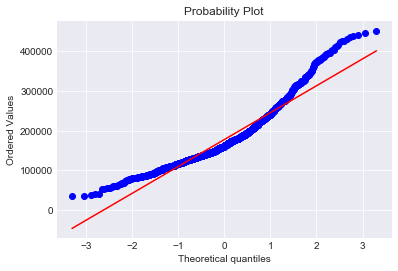

In [55]:
probplot(df["SalePrice"].dropna(), plot=plt);

In [56]:
from scipy.special import boxcox1p,inv_boxcox1p
skewed_features = df.skew()[abs(df.skew()) > .75].index.tolist()
skewed_features.remove("PoolQC")
lam = .15
for feat in skewed_features:
    df[feat] = boxcox1p(df[feat], lam)

In [57]:
train = df.loc[:test_begin[0]-1]
test = df.loc[test_begin[0]:]

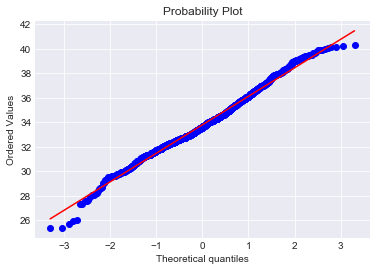

In [58]:
probplot(train["SalePrice"], plot=plt);

In [59]:
categorical_final = [col for col in categorical if col in df.columns]

In [60]:
dummy = pd.get_dummies(df[categorical_final], drop_first=True)
df = df.drop(categorical_final,axis=1)
df = pd.concat([df,dummy], axis=1)

In [95]:
train = df.loc[:test_begin[0]-1]
test = df.loc[test_begin[0]:]

In [96]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, ShuffleSplit
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet, BayesianRidge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

In [97]:
def predict(alg, X_train, y_train, X_test, name):
    alg.fit(X_train, y_train)
    try:
        predict = alg.best_estimator_.predict(pca.transform(scale.transform(X_test)))
        print(alg.best_estimator_)
        print("RMSE: ", np.sqrt(mean_squared_error(y_train, alg.predict(X_train))))
        print("CVS: ", cross_val_score(alg.best_estimator_, X_train, y_train).mean())
        plt.scatter(y_train, alg.best_estimator_.predict(X_train))
    except:
        predict = alg.predict(pca.transform(scale.transform(X_test)))
        print("RMSE: ", np.sqrt(mean_squared_error(y_train, alg.predict(X_train))))
        print("CVS: ", cross_val_score(alg, X_train, y_train).mean())
        plt.scatter(y_train, alg.predict(X_train))
    data = pd.DataFrame(inv_boxcox1p(predict,lam).tolist(),index=test_begin,columns=["SalePrice"])
    data.to_csv(name+".csv")
    return data

In [98]:
X_train = train.drop("SalePrice", axis=1)
y_train = train["SalePrice"]
test = test.drop("SalePrice", axis=1)

In [99]:
scale = StandardScaler()

In [100]:
ssplit = ShuffleSplit()

In [101]:
X_train_scaled = scale.fit_transform(X_train)

In [102]:
pca = PCA()

In [103]:
pca.fit(X_train_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

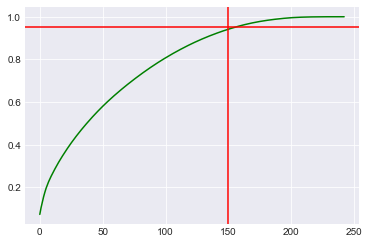

In [104]:
plt.plot(np.cumsum(pca.explained_variance_ratio_), color="green")
plt.axvline(150, color="red")
plt.axhline(.95, color="red")

In [105]:
pca = PCA(n_components=150)

In [106]:
X_train_pca = pca.fit_transform(X_train_scaled)

RMSE:  0.6576979957096787
CVS:  0.046992628386919234


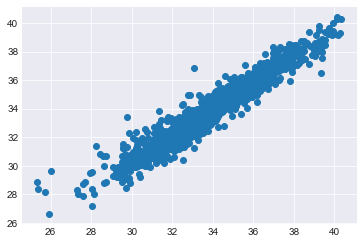

In [107]:
lin = predict(LinearRegression(), X_train_pca, y_train, test, "linear")

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=10000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
RMSE:  0.6670194172295579
CVS:  0.8899971664169793


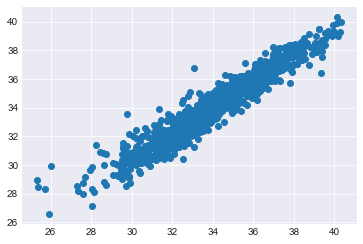

In [108]:
las_grid = {"alpha":[0.001,0.01,0.1,0.3],"max_iter":[10000]}
las = predict(GridSearchCV(Lasso(), param_grid=las_grid, cv=ssplit), X_train_pca, y_train, test, "lasso")

ElasticNet(alpha=0.01, copy_X=True, fit_intercept=True, l1_ratio=0.9,
      max_iter=100000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
RMSE:  0.665387717712087
CVS:  0.8894542894997711


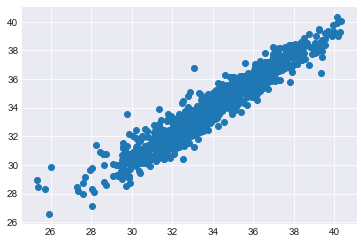

In [109]:
ela_grid = {"l1_ratio":[0.3,0.6,0.9],"alpha":[0.001,0.01,0.1,0.3],"max_iter":[100000]}
ela = predict(GridSearchCV(ElasticNet(), ela_grid, cv=ssplit), X_train_pca, y_train, test, "elastic")

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
       fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=100,
       normalize=False, tol=0.001, verbose=False)
RMSE:  0.659203550348111
CVS:  0.8885815063025616


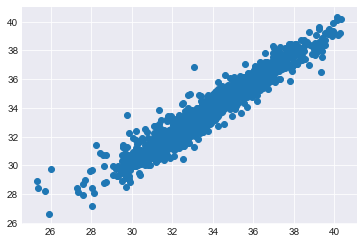

In [110]:
bayes_grid = {"n_iter":[100,300,600]}
bayesian = predict(GridSearchCV(BayesianRidge(), bayes_grid, cv=ssplit), X_train_pca, y_train, test, "bayesian")

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=60, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
RMSE:  0.3387555127143027
CVS:  0.8475539032602026


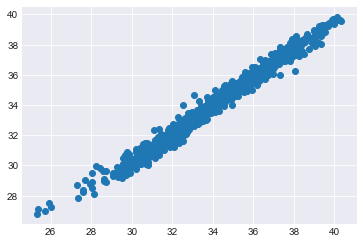

In [111]:
rfr_grid = {"n_estimators":[10,30,60]}
rfr = predict(GridSearchCV(RandomForestRegressor(), rfr_grid, cv=ssplit), X_train_pca, y_train, test, "rfr")

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='huber', max_depth=3,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=300,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)
RMSE:  0.33791200625800755
CVS:  0.8719567212606915


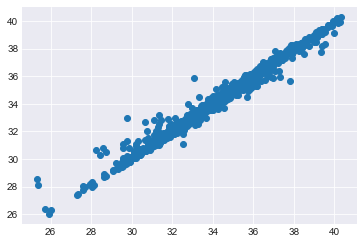

In [112]:
gbr_grid = {"n_estimators":[300,600],"learning_rate":[0.001,0.01,0.1]}
gbr = predict(GridSearchCV(GradientBoostingRegressor(loss="huber"), gbr_grid,n_jobs=5 , cv=ssplit), X_train_pca, y_train, test, "gbr")

In [116]:
final = 0.25*gbr+.6*bayesian+0.15*ela

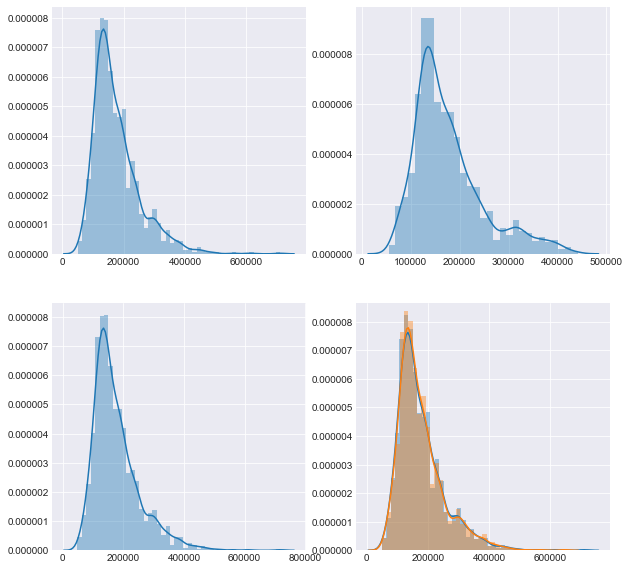

In [117]:
fig, ax = plt.subplots(2,2, figsize=(10,10))

sns.distplot(las, ax=ax[0,0])
sns.distplot(gbr, ax=ax[0,1])
sns.distplot(bayesian, ax=ax[1,0])
sns.distplot(ela, ax=ax[1,1])
sns.distplot(final)

In [118]:
final.to_csv("gbr+bayesian+ela.csv")